In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
from pathlib import Path
csvpath = Path('../Resources/weather.csv', parse_dates=True, index_col='Date')
df = pd.read_csv(csvpath)
# Temperature readings of the first 24 hours
df.Temperature[:24]

0     46.2
1     44.6
2     44.1
3     43.8
4     43.5
5     43.0
6     43.1
7     42.3
8     42.5
9     45.9
10    49.4
11    52.4
12    54.9
13    57.1
14    58.4
15    59.1
16    59.1
17    58.0
18    54.5
19    51.3
20    49.2
21    48.1
22    47.2
23    46.4
Name: Temperature, dtype: float64

<AxesSubplot:>

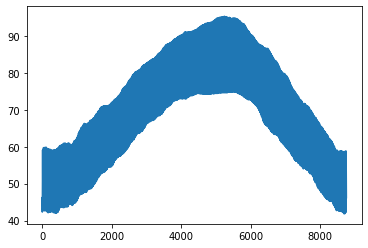

In [4]:
df.Temperature.plot()

In [5]:
df['Lag_Temperature'] = df.Temperature.shift()
df['Temperature_Difference'] = df.Temperature.diff()
df.head()

,Temperature,DewPoint,Pressure,Date,Lag_Temperature,Temperature_Difference
0,46.2,37.5,1.0,20100101 00:00,NaN,NaN
1,44.6,37.1,1.0,20100101 01:00,46.2,-1.6
2,44.1,36.9,1.0,20100101 02:00,44.6,-0.5
3,43.8,36.9,1.0,20100101 03:00,44.1,-0.3
4,43.5,36.8,1.0,20100101 04:00,43.8,-0.3


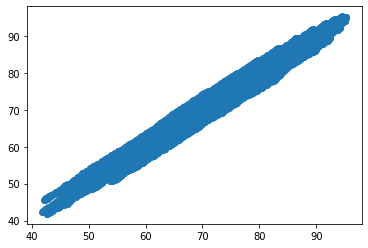

In [6]:
# Scatter plot of lagged temperature vs temperature
x = df['Lag_Temperature']
y = df['Temperature']
plt.scatter(x, y)

<AxesSubplot:>

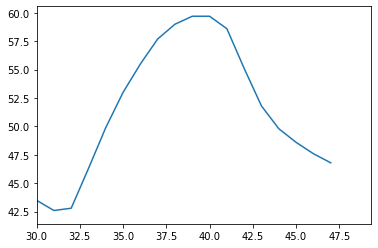

In [7]:
# Plot of the first 48 hours of temp
df.Temperature[:48].plot(xlim=30)

In [8]:
# Autocorrelation
df.Temperature.autocorr(lag=1)

0.9909018726597643

In [9]:
# Autocorrelation at lag of 24
df.Temperature.autocorr(lag=24)

0.99979474523129

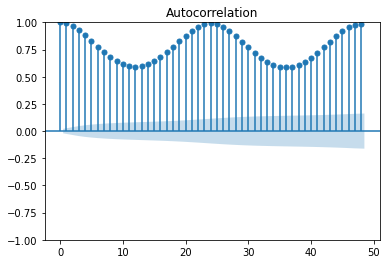

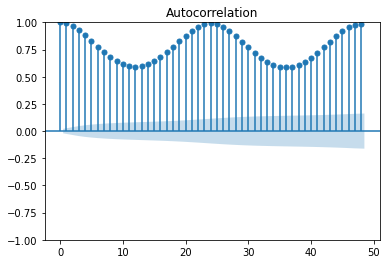

In [10]:
# plot_acf() measures autocorrelation at different lags
# Highest auto-correlation at lag of 24 hours
plot_acf(df.Temperature, lags=48)

c:\Users\Roger.Lopez\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


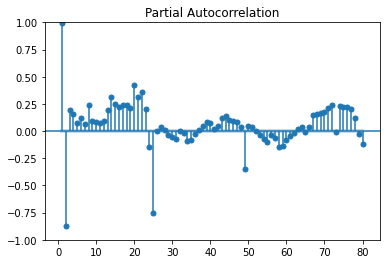

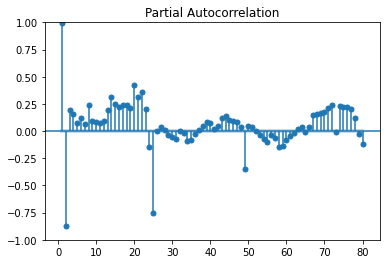

In [11]:
sm.graphics.tsaplots.plot_pacf(df.Temperature, lags=80, zero=False)